In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import pyspark as ps
from pyspark.sql import functions as F

In [14]:
# Setting working directory.
os.chdir('/home/juan/proyectos/docker/learning-docker/basic-ml-proj/')

## Data loading

Here we load the raw data and change the name of columns to make them accesible as attributes of the dataframe.

In [25]:
# Data loading.
iris_data = pd.read_parquet('data/raw/iris.parquet')

# Renaming columns.
iris_data.columns = [col.strip().replace(' ', '_').replace('(cm)', '') for col in iris_data.columns]

iris_data

,sepal_length_,sepal_width_,petal_length_,petal_width_,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


As we do not have expert information about this variables, we do this description to quickly see which values currently take each feature.

In [26]:
# Descriptive statistics.
iris_data.describe()

,sepal_length_,sepal_width_,petal_length_,petal_width_,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Here, grouping by the target variable, see how (if the case) each feature behaves differently in mean, std, min and max. We find a **clear** differentiation between each class in each of the variables. We find that:

1. Classes are ordered

/tmp/ipykernel_117349/3707317337.py:6: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  long_format_data = grouped_data.stack(0).reset_index() # Stacking the multi-index DataFrame.


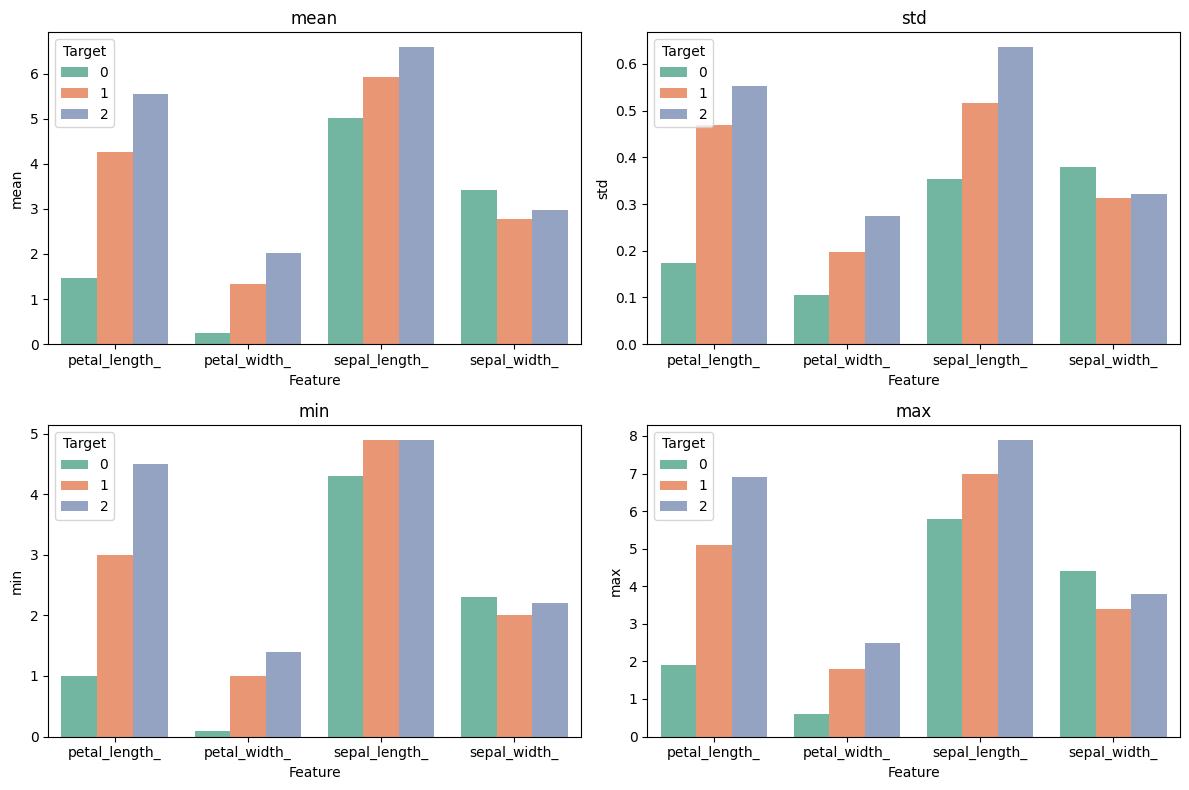

In [55]:
# Independent variable analysis.
columns = iris_data.columns[:-1]

# Statistics by target.
grouped_data = iris_data.groupby('target')[columns].agg(['mean', 'std', 'min', 'max'])
long_format_data = grouped_data.stack(0).reset_index() # Stacking the multi-index DataFrame.
long_format_data.columns = ['target', 'feature', 'mean', 'std', 'min', 'max'] # Renaming columns.

# Comparison between variables over statistics.
fig, ax = plt.subplots(2, 2, figsize = (12, 8))

for statistic in long_format_data.columns[2:]:
    sns.barplot(
        data = long_format_data,
        x = 'feature',
        y = statistic,
        hue = 'target',
        palette = 'Set2',
        ax = ax.flatten()[list(long_format_data.columns[2:]).index(statistic)],
        dodge = True,
    )
    
    ax.flatten()[list(long_format_data.columns[2:]).index(statistic)].set_title(statistic)
    ax.flatten()[list(long_format_data.columns[2:]).index(statistic)].set_xlabel('Feature')
    ax.flatten()[list(long_format_data.columns[2:]).index(statistic)].set_ylabel(statistic)
    ax.flatten()[list(long_format_data.columns[2:]).index(statistic)].legend(title = 'Target', loc = 'upper left')

plt.tight_layout()
plt.show()

<font size = "5">
The plots show evidence of a positive correlation between petal length and width and sepal length. In the next block, we will calculate a correlation between features to investigate.
</font> 

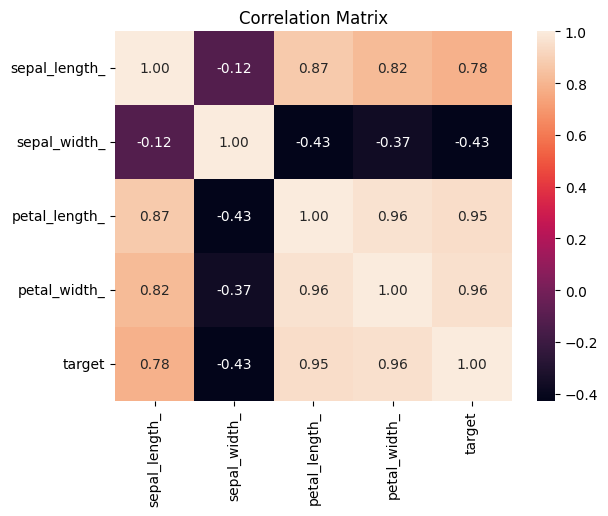

In [59]:
# Correlation matrix
sns.heatmap(iris_data.corr(), annot = True, fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

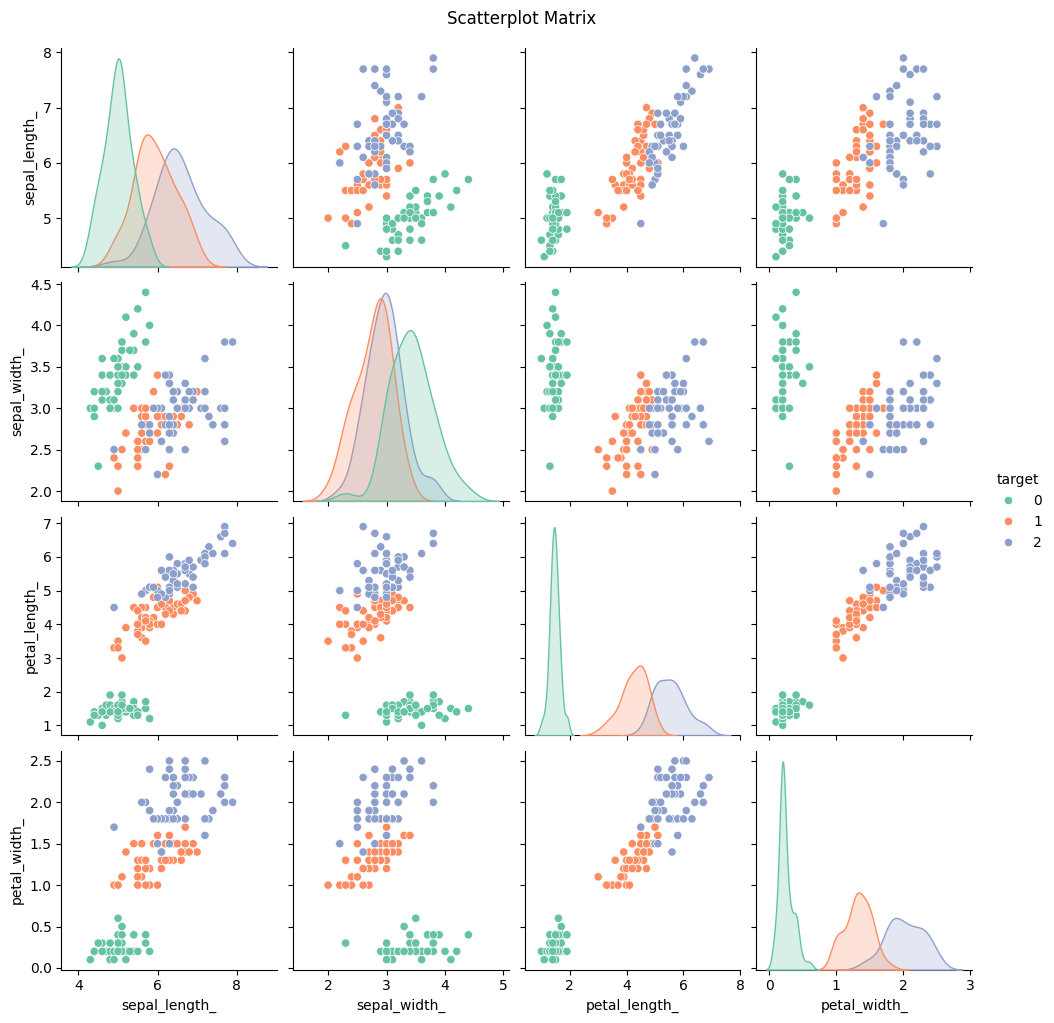

In [61]:
# Scatterplot matrix.
sns.pairplot(iris_data, hue = 'target', palette = 'Set2')
plt.suptitle('Scatterplot Matrix', y = 1.02)
plt.show()

Text(0.5, 1.0, 'PCA Results')

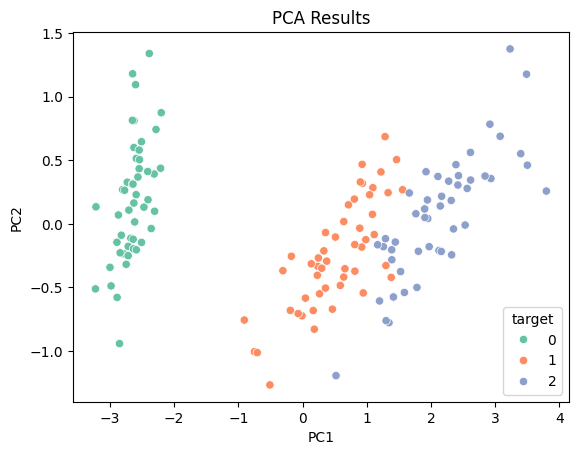

In [62]:
from sklearn.decomposition import PCA

# PCA analysis.
pca = PCA(n_components = 2)
iris_data_pca = pca.fit_transform(iris_data[columns]) # applying PCA to the features only
iris_data_pca_df = pd.DataFrame(data = iris_data_pca, columns = ['PC1', 'PC2'])
iris_data_pca_df['target'] = iris_data['target'].values # adding the target variable

# Plotting PCA results.
sns.scatterplot(iris_data_pca_df, x = 'PC1', y = 'PC2', hue = 'target', palette = 'Set2')
plt.title('PCA Results')